# Working with origamis/square-tiled surfaces in Sage

An $n$-origami (i.e. an origami made with $n$-squares) can be specified by describing how the right edge of each square glues to the left edge of some other square, and how the top edge of each square glues to the bottom edge of some other square. This gluing data $(\pi_r, \pi_u)$ corresponds to a permutation of $[1, 2, \ldots, N]$ (where $1, \ldots, N$ are the labels of the squares). Clearly, permuting the square labels will not change the resulting origami, which means if $(\pi_r, \pi_u)$ and $(\pi_r', pi_u')$ are conjugate elements via the same element of $S_n$, they correspond to the same origami.

## Constructing examples

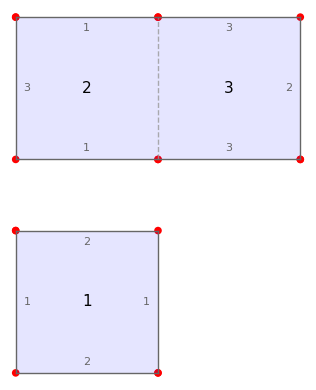

In [2]:
from surface_dynamics.all import Origami # Setting up the imports

up_permutation = '(2, 3)' # We are using cycle notation for permutation.
right_permutation = '(1, 2)'

origami_one = Origami(up_permutation, right_permutation)

origami_one.plot()

Sometimes it is convenient to adjust the positions of the squares in the generated image. This is done using the `set_positions` method.

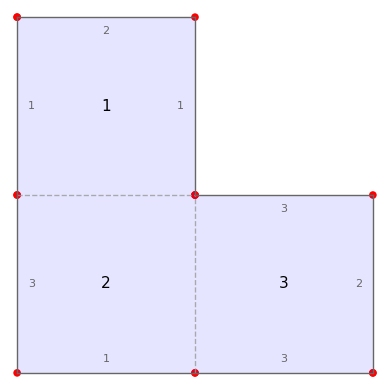

In [3]:
origami_one.set_positions([(0,2), (0,1), (1,1)])
origami_one.plot()

## Isomorphism for origamis
The surprising result is that the simultaneous conjugacy class of $(\pi_u, \pi_r)$ is a complete invariant, i.e. if two $n$-origamis are isomorphic by a cut-and-paste operation, they will have conjugate permutation data. This lets us determine whether two origamis are related by cut-and-paste operatations by simply checking whether the pairs of permutations defining the origamis are conjugate or not.

This is somewhat surprising since the cut-and-paste operations need not be along the building block squares of the origami, but can be any cut, for instance, along diagonals and so on.

In [6]:
origami_two = Origami('(2,3)', '(1,3)')
print(origami_one.is_isomorphic(origami_two))

origami_three = Origami('(1,2,3)', '')
print(origami_one.is_isomorphic(origami_three))

True
False


**(Optional) Exercise**: Come up with a fast algorithm to determine if a pair of elements in $S_n$ is simultaneously conjugate to some other pair. If you are feeling really brave, you can read how `surface_dynamics` does it ([link to code](https://gitlab.com/videlec/surface_dynamics/-/blob/master/surface_dynamics/flat_surfaces/origamis/normal_form.c)).

## Other methods on origamis

- Compute genus and stratum using the `genus` and `stratum` methods.

In [8]:
print(origami_one.stratum())
print(origami_three.stratum())

H_2(2)
H_1(0)


- Get horizontal cylinders of the origami

In [11]:
for cylinder in origami_one.cylinder_decomposition():
    print(cylinder)

([(1, 2)], [(2, 1)], 1, 1, 0, 0)
([(2, 1), (3, 3)], [(3, 3), (1, 2)], 2, 1, 0, 0)


### Interpreting the output of `cylinder_decomposition`
The `cylinder_decomposition` method outputs a list of cylinders. Each cylinder is a tuple of 6 elements. The first element is a list of saddle connections on the top boundary of the cylinder. The second element is the list of saddle connections on the bottom boundary of the cylinder. The third and fourth entries are the width and height of the cylinders. The fifth and sixth entries are the `bot_twist` and `top_twist` of the cylinder (it's not clear to me what that exactly is, so someone else can explain that bit).

#### Example of origami with non zero twist

([(1, 6)], [(3, 1)], 2, 1, 0, 0)
([(3, 1), (5, 4)], [(1, 6), (5, 4)], 4, 1, 0, 1)


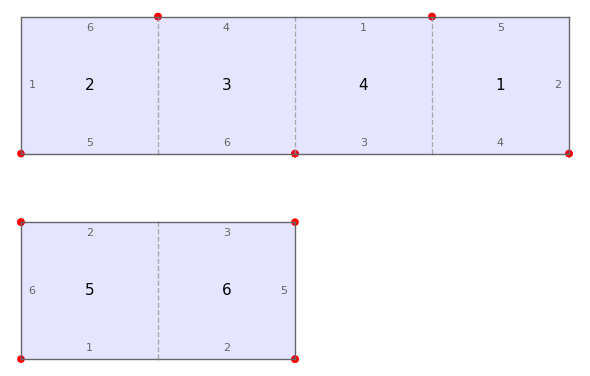

In [14]:
origami_four = Origami('(1,2,3,4)(5,6)', '(1,5,2,6,3,4)')
origami_four.plot()
for cylinder in origami_four.cylinder_decomposition():
    print(cylinder)
origami_four.plot()

- Another representation of horizontal cylinders

In [21]:
print(origami_four.cylinder_diagram(data=True))

((0)-(1) (1,2)-(0,2), [2, 2, 2], [1, 1], [0, 3])


The documentation on what the output represents is a little unclear, so perhaps the experts can weigh in.

## The $GL_2(\mathbb{R})$ action on origamis

Since origamis are translation surfaces, one can act on them via elements of $GL_2(\mathbb{R})$: however, it's not necessary that origamis get sent to origamis. Consider the following examples:
- $\begin{pmatrix}
    \sqrt{2} & 0 \\
    0 & 1
   \end{pmatrix}$: Stretching by $\sqrt{2}$ in the horizontal direction.
- $\begin{pmatrix}
    1 & \frac{1}{\sqrt{2}} \\
    0 & 1
  \end{pmatrix}$: Shearing in the horizontal direction.
- $\begin{pmatrix}
    \cos(1) & \sin(1) \\
    -\sin(1) & \cos(1)
  \end{pmatrix}$: Rotation clockwise by $1$ radian.
  
**(Optional) Exercise**: Show that these matrices send origamis to non-origamis.

Consider now the following matrices.
- $S = \begin{pmatrix}
    1 & 1 \\
    0 & 1
  \end{pmatrix}$: Shearing in the horizontal direction.
- $R = \begin{pmatrix}
    0 & 1 \\
    -1 & 0
  \end{pmatrix}$: Rotation clockwise by $\frac{\pi}{2}$ radians.
These matrices do send origamis to origamis. To see that, see what they do to a single square. Up to a cut-and-paste operation, single squares get sent to single squares. This tells us that $n$-origamis will get sent to $n$-origamis.

### Determining what $S$ and $R$ do to the permutation data

The matrix $R$ sends the right edge of a square to the up edge, and the up edge to the left edge. That means all the right gluings should become up gluings, and all the up gluings should become left gluings, which is the inverse of the right gluings.

**Exercise**: Work out what $S$ does to the gluings.

The library implements these two actions as methods on origamis.

- The action of $S^k$ is given by `horizontal_twist(k)`
- The action of $R$ is given by the composition of `mirror` and `horizontal_symmetry`.

In [22]:
sheared_origami = origami_one.horizontal_twist(1)
rotated_origami = origami_one.horizontal_symmetry().mirror()

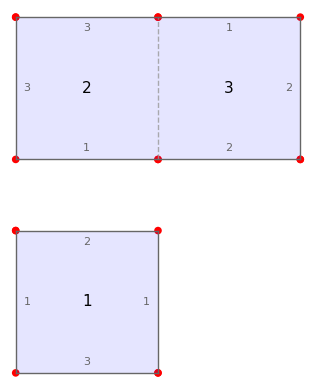

In [23]:
sheared_origami.plot()

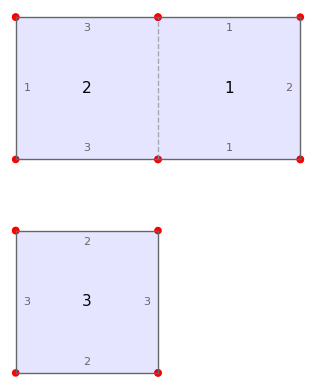

In [24]:
rotated_origami.plot()

**Fact**: The matrices $S$ and $R$ generate $SL_2(\mathbb{Z})$.

One of the proofs of this fact also gives a factorization algorithm, for instance the first proof in [this article](https://kconrad.math.uconn.edu/blurbs/grouptheory/SL(2,Z).pdf).

**Exercise**: Understand the proof and algorithm, and then write a function that takes in an element of $SL_2(\mathbb{Z})$ and an origami, and returns the origami obtained by acting on the original origami with the matrix. Verify that your function is correct by comparing the results against some simple examples you computed by hand.

## The action of elements not in $SL_2(\mathbb{Z})$

Consider the action of the matrix $T = \begin{pmatrix}1 & 1 \\ -1 & 1\end{pmatrix}$ on the standard square torus. One can think of this action as rotation by $\frac{\pi}{4}$ radians, and scaling the $x$ and $y$ directions by $\sqrt{2}$. This action doesn't send the square torus to itself, but rather to a $2$-origami. This suggests that this action maps $n$-origamis to $2n$-origamis.

**Exercise**: Given an $n$-origami $O$ with gluing data $(r, u)$, determine the gluing data for $T(O)$.

**Long term goal**: Figure out which matrices in $GL_2(\mathbb{R})$ map $n$-origamis to $m$-origamis, and implement the associated action in Sage.

## Why are we doing this?

Recall that at the end of day 1, we showed that `origami_one` had convex presentation by showing that in the $\frac{\pi}{4}$ direction, it consisted of a single cylinder. In general, we want to analyze the cylinders in various directions for a given origami. Being able to rotate origamis to get origamis is a computationally convenient way of doing this.